## [EDA]Heatmap & Grid-scatters
- 可以有效的將表格型的圖進行視覺化, 常見的 Heatmap

   - 相關圖
   - comfusion matrix(混淆矩陣)

In [3]:
# Import 需要的套件
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
#設定資料讀取路徑
dir_path = '/home/edith/文件/100days-data/'
data_app = os.path.join(dir_path,'application_train.csv')
data_app1 = pd.read_csv(data_app)
data_app1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 取出 EXT_SOURCE 的幾項變數並檢驗其相關性
data_app1['DAYS_BIRTH'] = abs(data_app1['DAYS_BIRTH'])
ext_data = data_app1[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5,1,'Correlation Heatmap')

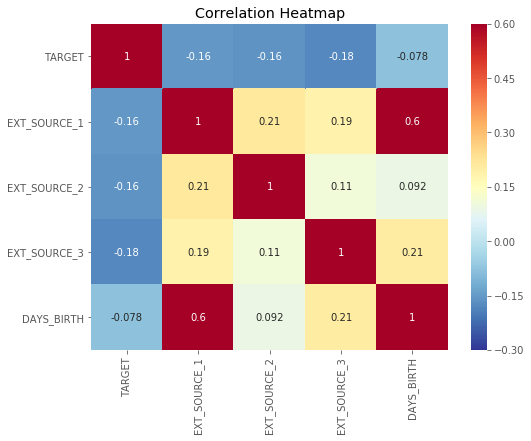

In [16]:
plt.figure(figsize=(8,6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.3, annot = True, vmax = 0.6)
#cmap顏色 vmin是y軸最小值 vmax為y軸最大值 annot為控制框框裡的數字是否顯示

plt.title('Correlation Heatmap')

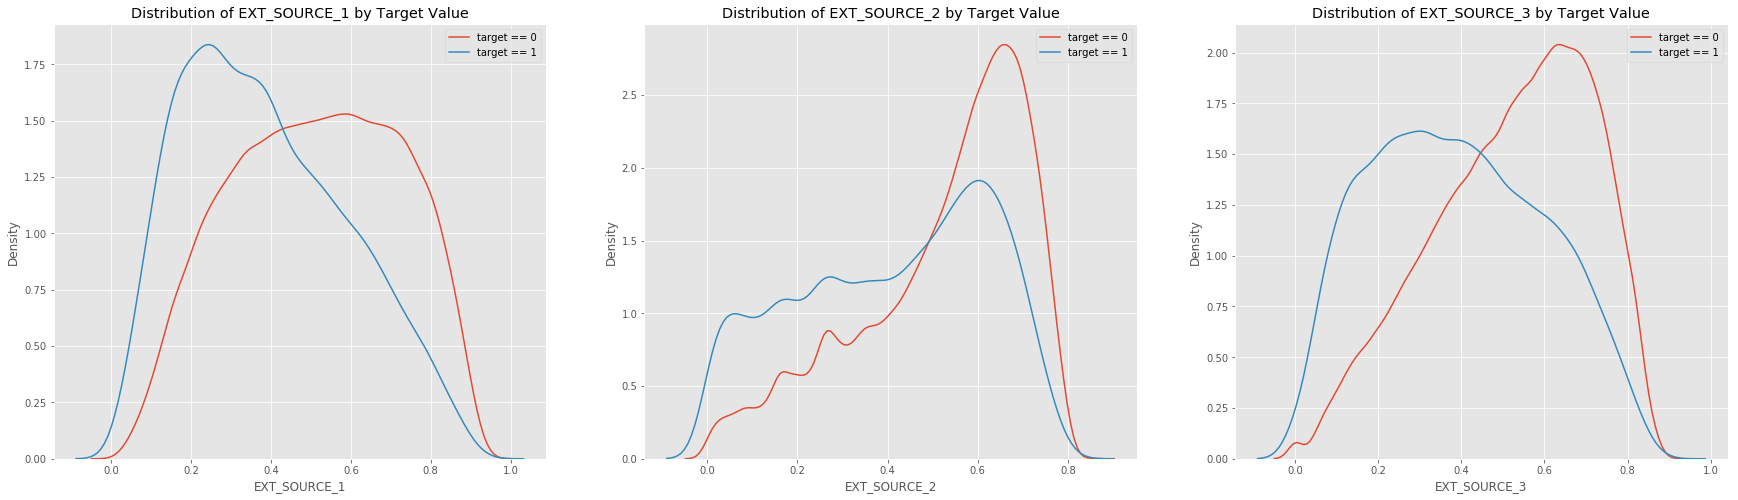

In [31]:
# 進一步我們檢查這三項變數在 Target 上的分布是否不同

plt.figure(figsize=(30,8))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
     # 做 subplot
    plt.subplot(1, 3, i+1)
    
    #KDE
    sns.kdeplot(data_app1.loc[data_app1['TARGET']== 0, source], label = 'target == 0')
    sns.kdeplot(data_app1.loc[data_app1['TARGET']== 1, source], label = 'target == 1')
    
    #Label it
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s'% source);
    plt.ylabel('Density')
    
# plt.tight_layout(h_pad = 2.5)

In [41]:
# 轉成以年記齡後，將以日記齡丟掉
plot_data = ext_data.copy() #備份數值不隨著母數更改而變動
plot_data['YEARS_BIRTH'] = plot_data['DAYS_BIRTH'] / 365
plot_data.drop(['DAYS_BIRTH'], axis=1, inplace=True)

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".formate(r), xy = (.2, .8), xycoords = ax.transAxes, size = 20)

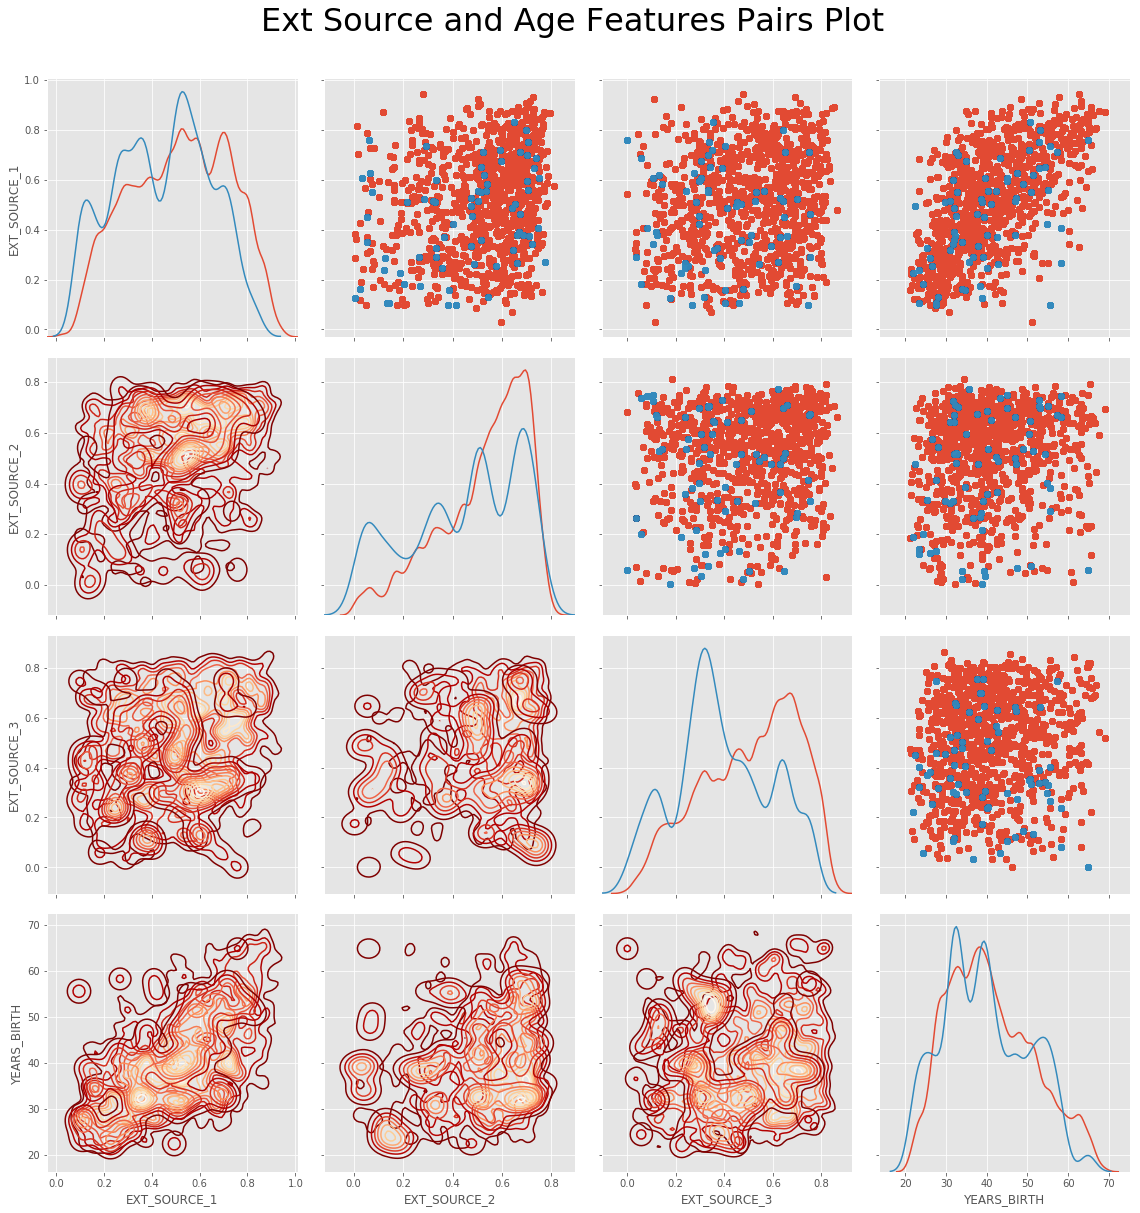

In [71]:
N_sample = 100000

# Drop na values and limit to 100000 data: 因為要畫點圖，如果點太多，要畫很久
plot_data = plot_data.dropna().sample(n = N_sample, replace = True)

#Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False, hue= 'TARGET', vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)


#對角線畫 Histogram
grid.map_diag(sns.kdeplot)

#下半部為 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

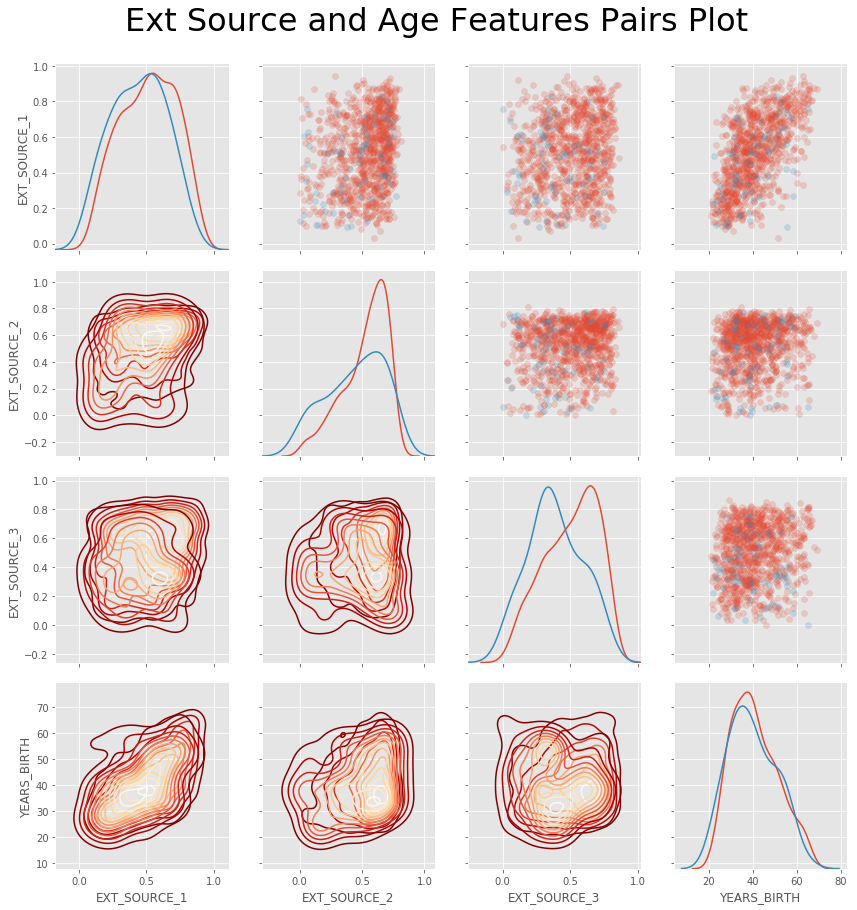

In [64]:
# 試著以不同 size 畫看看，觀察有那裡不太一樣
N_sample = 1000

plot_data = plot_data.dropna().sample(n = N_sample)
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# 上半部為 scatter
grid.map_upper(plt.scatter, alpha = 0.2)

# 對角線畫 histogram
grid.map_diag(sns.kdeplot)

# 下半部放 density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)
plt.show()

### 作業
- 1.請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
- 2.請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot(上半部為 scatter, 對角線為 hist, 下半部為 density)
- 3.請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)


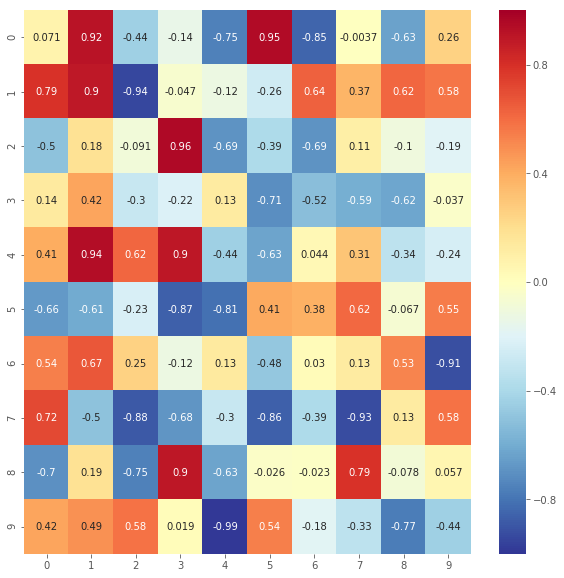

In [94]:
"""
Your Code Here
"""
#randf: depend on size, create a random float matrix, list or just a single value ,range of value is 0~1
#如果要讓變數在-1~1之間，一定要乘2，減1
matrix =  2*np.random.random((10,10)) -1

plt.figure(figsize=(10,10))
"""
Your Code Here
"""
heatmap = sns.heatmap(matrix,cmap = plt.cm.RdYlBu_r, vmin = -1.0, annot = True, vmax = 1)

plt.show()

indice=1000
plot_data=
          0         1         2
a -0.128551 -0.749792 -0.539345
c -0.598922 -0.425408 -0.627527
a -0.144688 -0.891799 -0.704511
c -0.576449 -0.238843 -0.833094
c -0.739401 -0.508866 -0.818944


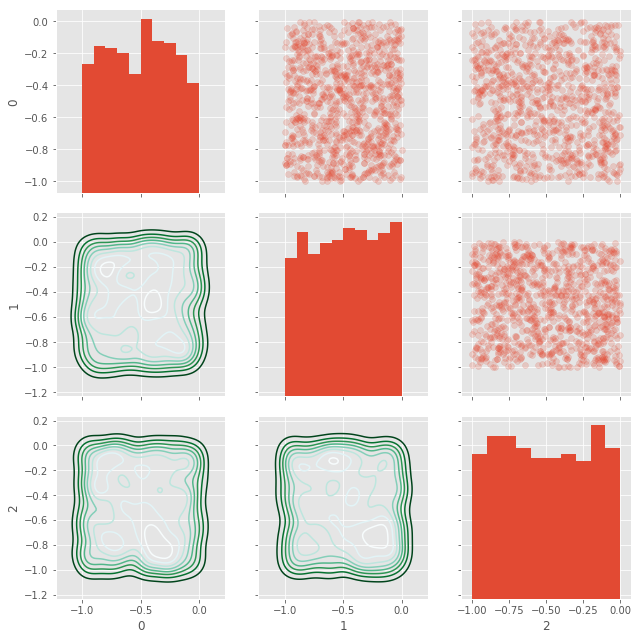

In [108]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = np.random.random(size=(nrow, ncol)) - 1

indice = np.random.choice(["a","b","c"], size=nrow)
print("indice={}".format(len(indice)))
plot_data = pd.DataFrame(matrix, indice)
print("plot_data=\n{}".format(plot_data.head()))

grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False)#這邊size是控制圖形xy軸字體大小，數值越大，字越小
"""
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot , cmap = plt.cm.BuGn_r)

plt.show()

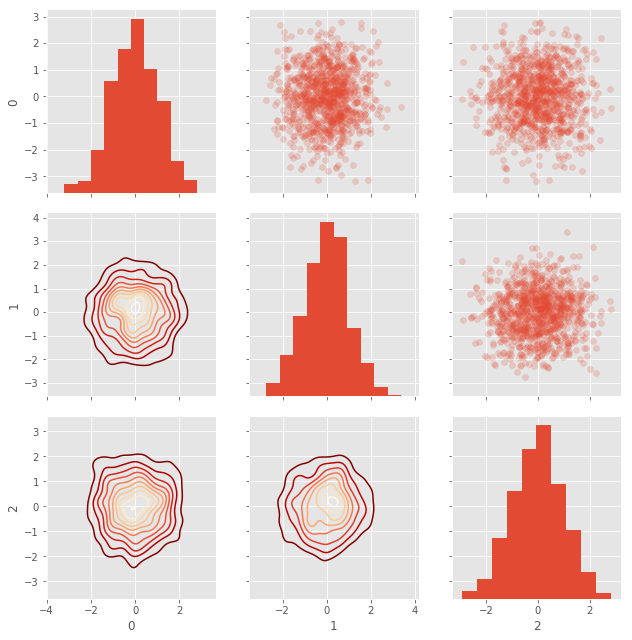

In [120]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = np.random.randn(nrow, ncol) #常態分配的寫法

indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice)


grid = sns.PairGrid(data = plot_data, size =3, diag_sharey=False) 
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(plt.hist )
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)

plt.show()